<h2><font color="#004D7F" size=6>DATA-SCIENCE PARA BIOSCIENCIAS (R, PYTHON, BIOINFORMÁTICA)</font></h2>



<h1><font color="#004D7F" size=5>Machine Learning y modelos predictivos</font></h1>

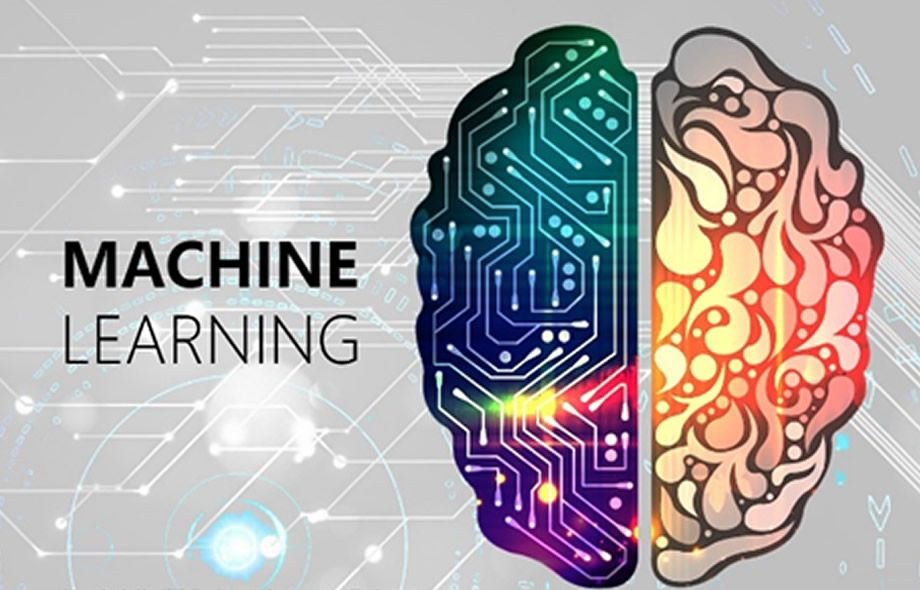

<br><br>
<div style="text-align: right">
<font color="#004D7F" size=3>Ricardo Borja R.</font><br>
<font color="#004D7F" size=3>Universitat de Barcelona, IRBio, Biost3</font><br>
<font color="#004D7F" size=3>Duración:1h</font><br>

---

<h2><font color="#004D7F" size=5>Temario</font></h2>

<a id="indice"></a>
-Machine Learning y modelos predictivos

-Ejemplo aplicado a un caso de clasificación.
1. Dataset y librerias
  * 1.1. Importar librerías
  * 1.2. Dataset y características
2. Estadística descriptiva
    * 2.1. Dimensiones del dataset
    * 2.2. Visualización de datos
    * 2.3. Resumen estadístico
    * 2.4. Distribución de clase
    * 2.5. Tipo de datos
3. Visualización del dataset
    * 3.1. Gráficos Univariado
    * 3.2. Gráficos multivariados
4. Fase de modelado con técnicas predictivas ML clásicas
    * 4.1. Crear conjunto de validación
    * 4.2. Evaluación de línea base
    * 4.3. Evaluar modelos (transformación)
5. Fase de Optimización
6. Agoritmos ensamblados
7. Fase de forecasting

---
# <font color="#004D7F"> Introducción</font>

El ecosistema de Python está creciendo y puede convertirse en la plataforma dominante para el aprendizaje automático. La razón principal para adoptar Python para el desarrollo de modelos predictivos a traves de técnicas Machine Learning.
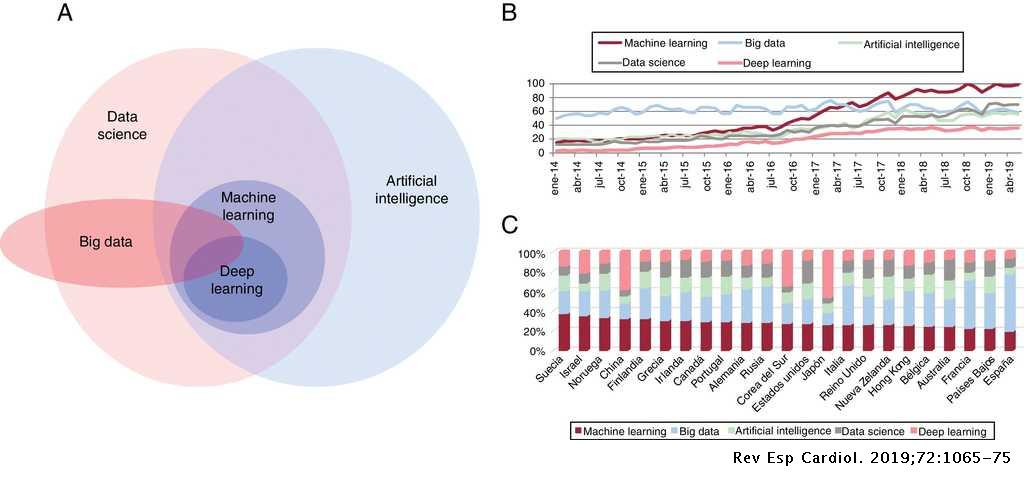

Machine Learning es una rama de la inteligencia artificial que trata sobre la construcción de algoritmos que pueden aprender y hacer predicciones de datos; básicamente algoritmos que aprenden de la experiencia.

El ML se ha convertido en un tipo de tecnologia de la información (TIC), dentro del area de la salud que permite el diagnostico y prevencion de enfermedades.

<h2> <font color="#004D7F" size=4> Tipos de implementación Machine Learning</font> </h2>

* Aprendizaje supervisado: Regresión y clasificación.

* Aprendizaje no supervisado: Clustering.

* Aprendizaje de refuerzo.

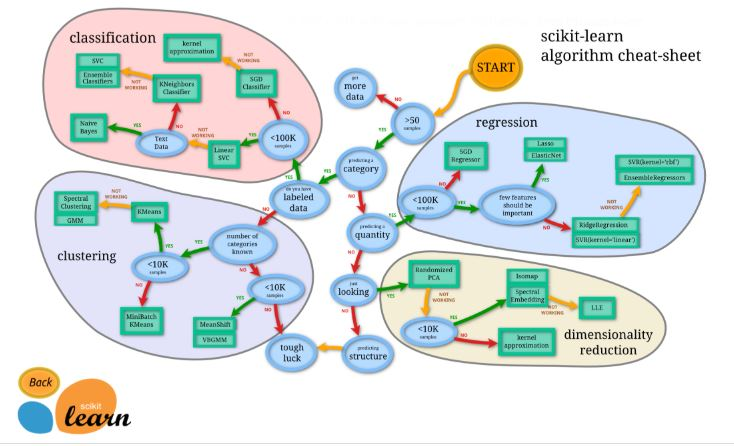

<h2> <font color="#004D7F" size=4> Algoritmos habituales</font> </h2>

* Árboles de decisión.

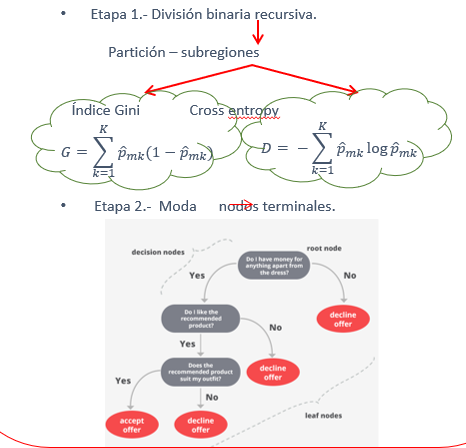
* Random Forest.
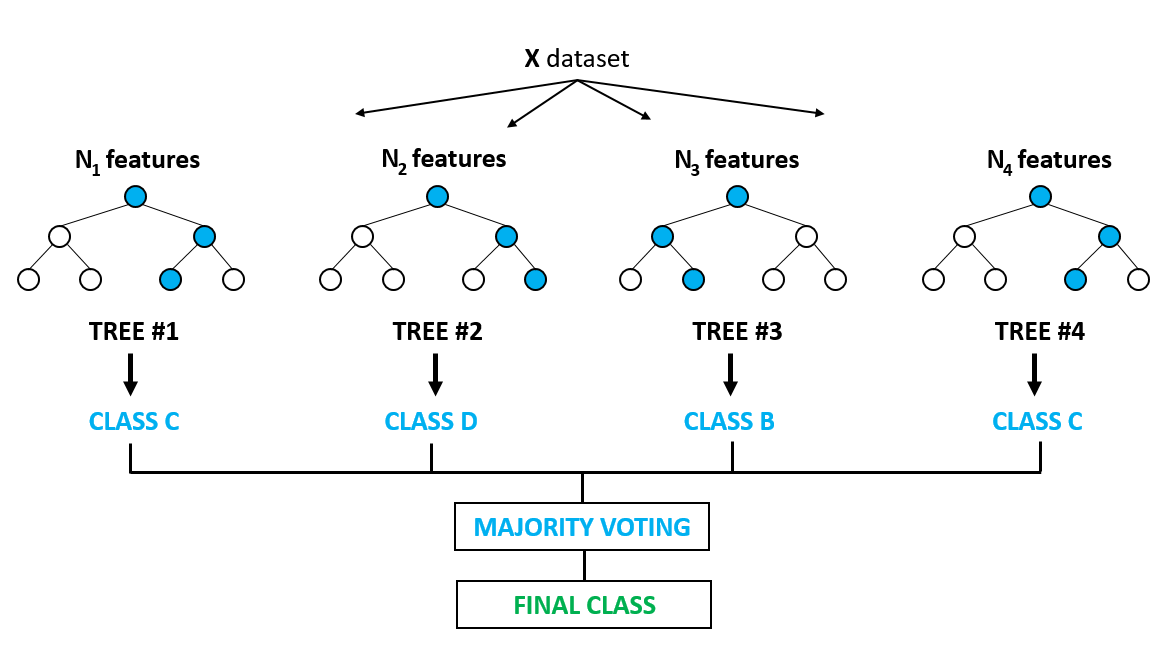

* KN Neighbours (vecinos cercanos)
* Análisis Lineal Discriminante.
* Regresión logística.

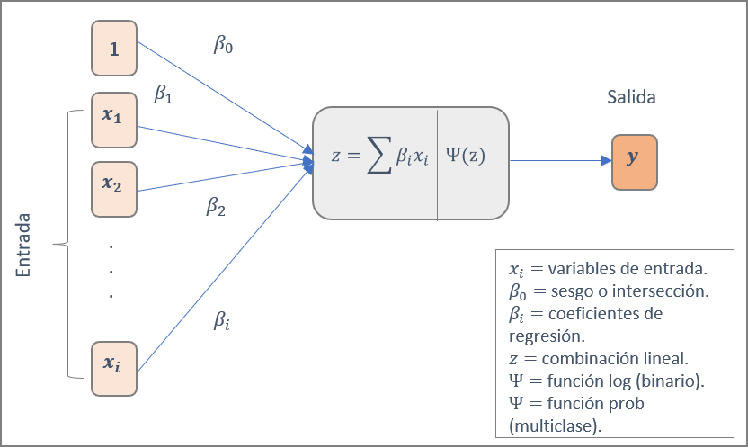
* Support Vector Machine (SVM).

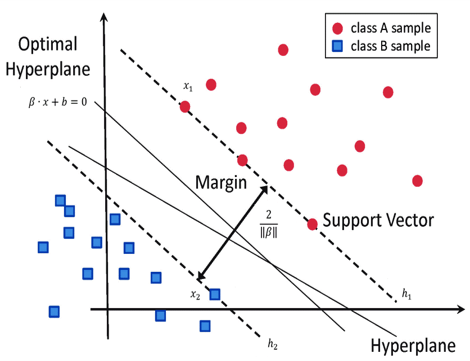
* Métodos ensemble.

<h2> <font color="#004D7F" size=4> Usos prácticos</font> </h2>

* Seguridad informatica.
* Reconocimiento de imágenes.
* Conducción autónoma.
* Mercado de valores.
* Salud.

<h2> <font color="#004D7F" size=4> Proceso para el desarrollo de un proyecto de ML</font> </h2>

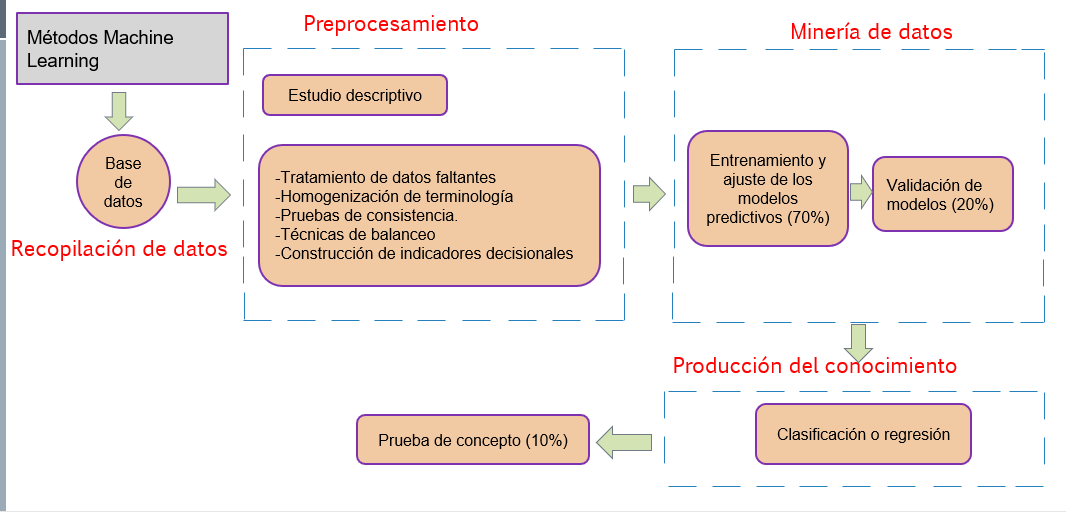

---
<center>
<h2> <font color="#004D7F" size=6> Ejemplo aplicado a un caso de clasificación</font> </h2>
</center>

# <font color="#004D7F"> 1.  Dataset y Librerias</font>


## <font color="#004D7F"> 1.1. Importar librerias</font>

Los paquetes o librerías son la forma en que se distribuye el código Python de terceros. Estos paquetes pueden descargarse e instalar con la función `!pip install Package`.

In [ ]:
!pip install matplotlib
# Instalar scikit-learn
!pip install scikit-learn
# Cargar librerias
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Cargar sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

import warnings
warnings.filterwarnings('ignore')


## <font color="#004D7F"> 1.2. Dataset y características</font>

**Caracteristicas de la base de datos**




Para desarrollar el modelo predictivo se trabajará con una base de datos proveniente de UCI Machine Learning (oppen access). La cual consta de 9 variables de datos antropométricos y parámetros que se pueden recopilar en análisis de sangre de rutina. La décima variable es la objetivo dependiente binario, que indica la presencia o ausencia de cancer de seno. Por lo tanto, se trabajará con un problema de clasificación binaria.

La base de datos puede ser descargada de la dirección: http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra

En primera instancia se accedera al drive en donde se encuentra la carpeta de trabajo y se extarera los datos R2, utilizando la libreria pandas. La base de datos es de formato csv.

In [ ]:
# Cargar el data set ubicado en drive
from google.colab import drive
drive.mount('gdrive')

Drive already mounted at gdrive; to attempt to forcibly remount, call drive.mount("gdrive", force_remount=True).


In [ ]:
# Extraer base de datos
ubicacion= "/content/gdrive/MyDrive/Machine Learning - UB_Ricardo Borja/dataR2.csv"
data= pd.read_csv(ubicacion)



# <font color="#004D7F"> 2. Estadística descriptiva</font>

La estadistica descriptiva permitirá conocer:

* Las dimensiones del conjunto de datos.
* Visualizacion de datos.
* Resumen estadístico.
* Distribución de clase.
* Tipos de datos.
* Valores NaN presentes.


## <font color="#004D7F"> 2.1. Dimensiones del conjunto de datos</font>

In [ ]:
# shape
print(data.shape)

(116, 10)


Se trabaja con 116 instancias y 10 variables. Inicialmente se podría intuir que la cantidad de instancias afectará en gran manera a la efciencia del modelo.


## <font color="#004D7F"> 2.2. Visualización de datos</font>

In [ ]:
# head
pd.set_option('display.width', 100)
data.head(5)

Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  Resistin    MCP.1  \
0   48  23.500000       70    2.707  0.467409   8.8071     9.702400   7.99585  417.114   
1   83  20.690495       92    3.115  0.706897   8.8438     5.429285   4.06405  468.786   
2   82  23.124670       91    4.498  1.009651  17.9393    22.432040   9.27715  554.697   
3   68  21.367521       77    3.226  0.612725   9.8827     7.169560  12.76600  928.220   
4   86  21.111111       92    3.549  0.805386   6.6994     4.819240  10.57635  773.920   

   Classification  
0               1  
1               1  
2               1  
3               1  
4               1

La característica 10 es la variable objetivo, la cual es binaria de (1-2)


## <font color="#004D7F"> 2.3. Resumen estadístico</font>

Ya que no tenemos datos en un mismo rango  de valores debemos conocer sus características estadisticas que me permitan conocer más mis datos a trabajar.

In [ ]:
, precision_score
# descriptions
data.describe()

Age         BMI     Glucose     Insulin        HOMA      Leptin  Adiponectin  \
count  116.000000  116.000000  116.000000  116.000000  116.000000  116.000000   116.000000   
mean    57.301724   27.582111   97.793103   10.012086    2.694988   26.615080    10.180874   
std     16.112766    5.020136   22.525162   10.067768    3.642043   19.183294     6.843341   
min     24.000000   18.370000   60.000000    2.432000    0.467409    4.311000     1.656020   
25%     45.000000   22.973205   85.750000    4.359250    0.917966   12.313675     5.474283   
50%     56.000000   27.662416   92.000000    5.924500    1.380939   20.271000     8.352692   
75%     71.000000   31.241442  102.000000   11.189250    2.857787   37.378300    11.815970   
max     89.000000   38.578759  201.000000   58.460000   25.050342   90.280000    38.040000   

         Resistin        MCP.1  Classification  
count  116.000000   116.000000      116.000000  
mean    14.725966   534.647000        1.551724  
std     12.390646   345.912663        0.499475  
min      3.210000    45.843000        1.000000  
25%      6.881763   269.978250        1.000000  
50%     10.827740   471.322500        2.000000  
75%     17.755207   700.085000        2.000000  
max     82.100000  1698.440000        2.000000

Se observa una media diferente y ademas con grandes saltos. Esto inicialmente nos impulsaria a realizar un escalamiento o normalizacion de los datos



## <font color="#004D7F"> 2.4. Distribución de clase</font>

 Ahora se observará el balanceo en las dos clases a predecir.

In [ ]:
# class distribution
print(data.groupby('Classification').size())

Classification
1    52
2    64
dtype: int64


La clase 1 (52) pertenece a controles en donde se confirmó la inexistencia del cancer, mientras que 64 mujeres del grupo control presentaron cancer de mama.


## <font color="#004D7F"> 2.5. Tipo de datos</font>

Antes de realizar algun proceso o calculo es importante conocer el typo de datos de cada característica, ya que si es necesario deberá sufrir la transformación correspondiente.

In [ ]:
# types
print(data.dtypes)

Age                 int64
BMI               float64
Glucose             int64
Insulin           float64
HOMA              float64
Leptin            float64
Adiponectin       float64
Resistin          float64
MCP.1             float64
Classification      int64
dtype: object


<a id="section311"></a>
### <font color="#004D7F"> Valores NaN</font>


In [ ]:
array = data.values
X = array[:,0:9]
Y = array[:,9]

# Después comprobamos los NaN's de nuestros datos, esto podemos hacerlo con Numpy.
print(np.sum(np.isnan(X)))

0


Es importante verificar que no tenemos valores NaN en nuestro dataset, de lo contrario se hubiese aplicado un proceso de imputación.

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---


# <font color="#004D7F"> 3. Visualización del conjunto de datos</font>

Es necesario visualizar los datos.

* Gráficos univariados
* Gráficos multivariados


## <font color="#004D7F"> 3.1. Gráficos Univariados</font>

Gráficas de cada variable individual.


### <font color="#004D7F"> Boxplots</font>
Dado que las variables de entrada son numéricas, podemos crear Gráficas Boxplots de cada uno.

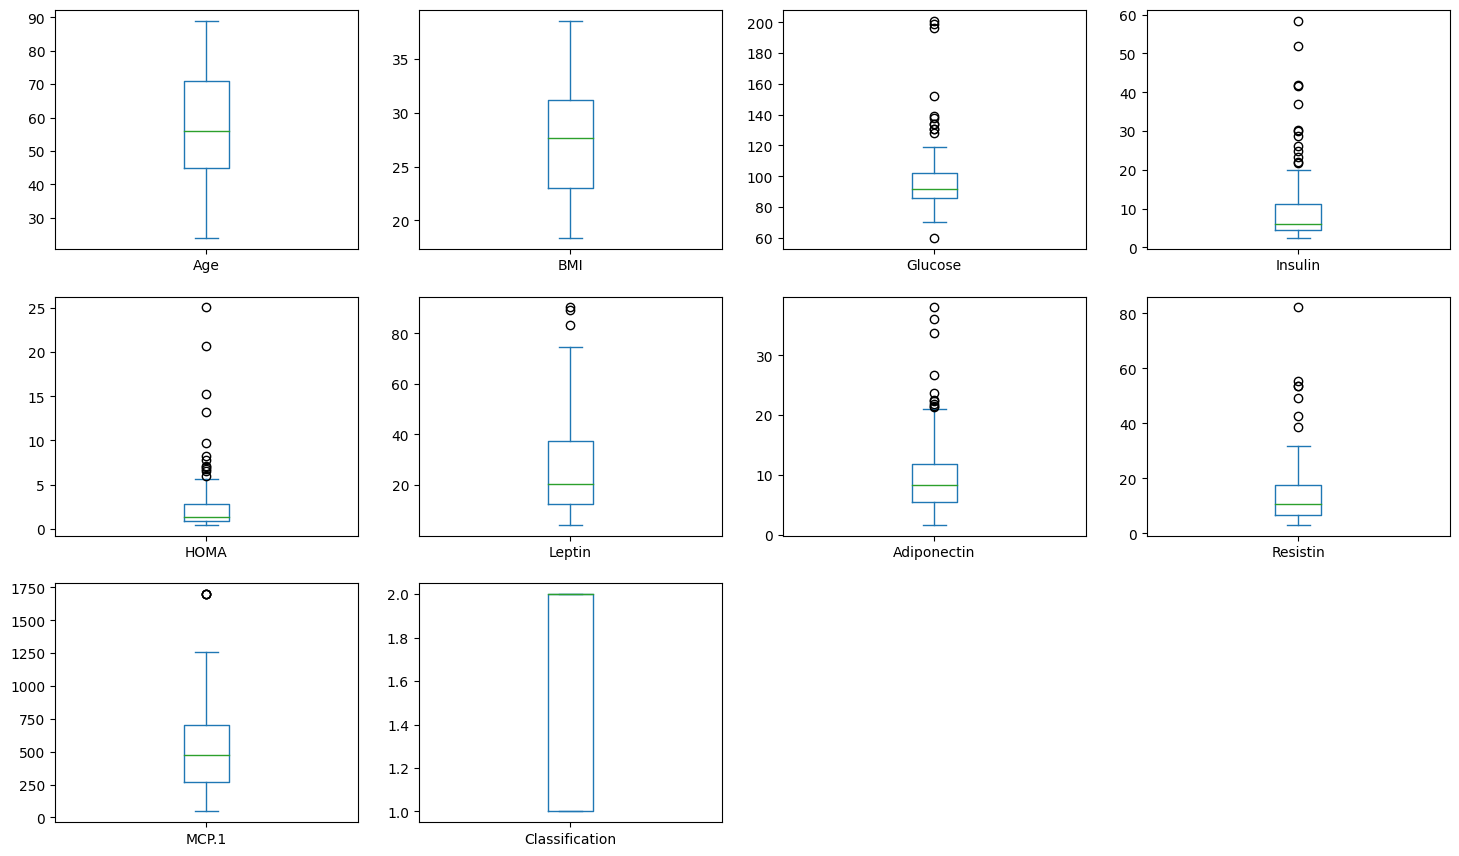

In [ ]:
# box and whisker plots - Matplotlib
fig = plt.figure(figsize = (18,18))
ax = fig.gca()
(data.rename(columns=lambda x: str(x))
        .plot(ax=ax, kind= 'box', subplots=True, layout=(5,4))
)
plt.show()

Las variables  insulin, leptin, HOMA y Adiponectin presentan atípicos en mayor cantidad que las demas variables.


## <font color="#004D7F"> 3.2. Gráficos multivariados</font>

Para conocer la interaccion entre las variables se analizará la tabla de correlación.


### <font color="#004D7F"> Correlación entre atributos</font>


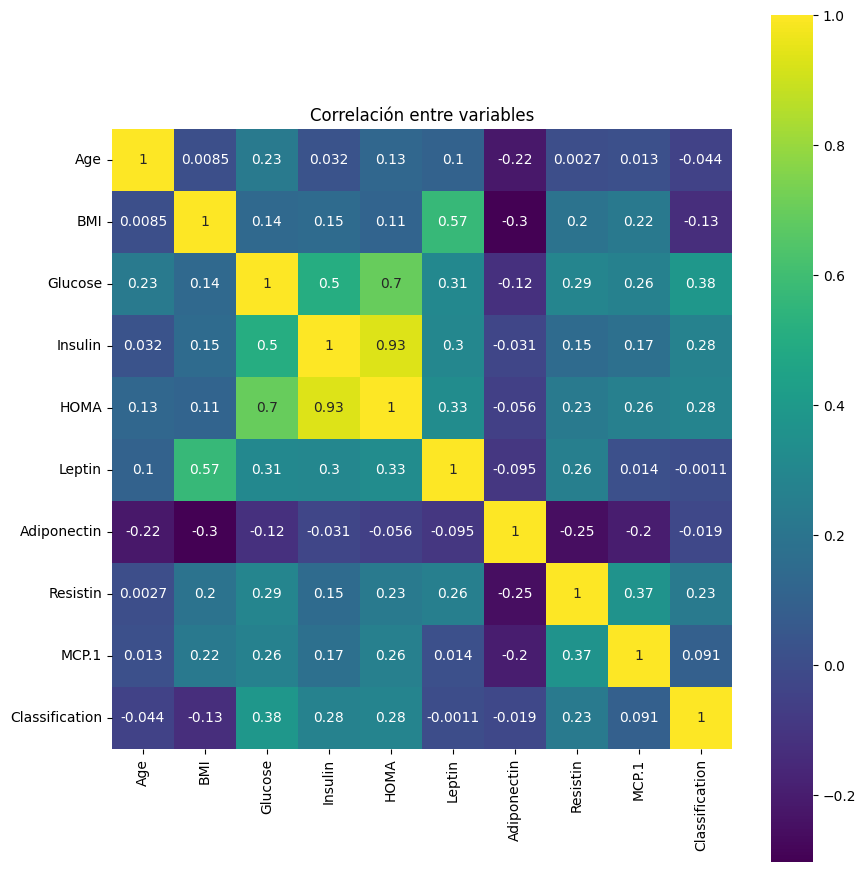

In [ ]:
# correlation matrix
correlacion = data.corr()
plt.figure(figsize=(10,11))
ax = sns.heatmap(correlacion, vmax=1, square=True, annot = True, cmap = 'viridis')
ticks = np.arange(0.5,10.5,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.title('Correlación entre variables')
plt.show()


La grafica demuestra la alta correlación entre las variables HOMA con insulina y glucosa.



<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---


# <font color="#004D7F"> 4. Fase de modelado con técnicas predictivas ML clásicas</font>

Ahora es el momento de crear algunos modelos de datos y estimar su Accruacy .
* Crear conjunto de validación.
* Evaluación de línea base.
* Evaluar algoritmos: Estandarización - Normalización - Box-Cox.


## <font color="#004D7F"> 4.1. Crear conjunto de validación</font>

Dividiremos el conjunto de datos cargado en dos, el 80% utilizaremos para entrenar nuestros modelos y el 20% como un conjunto de datos de validación

In [ ]:
# Split-out validation dataset
X = array[:,0:9].astype(float)
Y = array[:,9]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

Ahora tiene datos de entrenamiento en `X_train` e `Y_train` para preparar modelos y conjuntos de `X_validation` e `Y_validation` que podemos usar más adelante.


## <font color="#004D7F"> 4.2. Evaluación de línea base</font>

Creamos una línea base de rendimiento en este problema y verifiquemos varios algoritmos diferentes. Seleccionaremos un conjunto de algoritmos diferentes capaces de trabajar en este problema de clasificación. Los seis algoritmos seleccionados incluyen:
* __Algoritmos lineales:__ LoR y LDA.
* __Algoritmos no lineales:__ CART, SVM, NB y $k$-NN.

In [ ]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'

# Spot Check Algorithms
models = []
models.append(('LoR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

Mostraremos la media y la desviación estándar de Accuracy para cada algoritmo a medida que lo calculemos


In [ ]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean()*100.0:,.2f}% ({cv_results.std()*100.0:,.2f}%)")

LoR: 73.00% (13.70%)
LDA: 73.11% (13.14%)
KNN: 45.67% (16.68%)
CART: 64.22% (17.11%)
NB: 63.78% (14.41%)
SVM: 38.00% (12.95%)


Se observa que los mejores modelos son los lineales, sin embargo los no lineales tampoco poseen una accuracy muy lejana, para considerar un ajuste de sus hiperparametros.



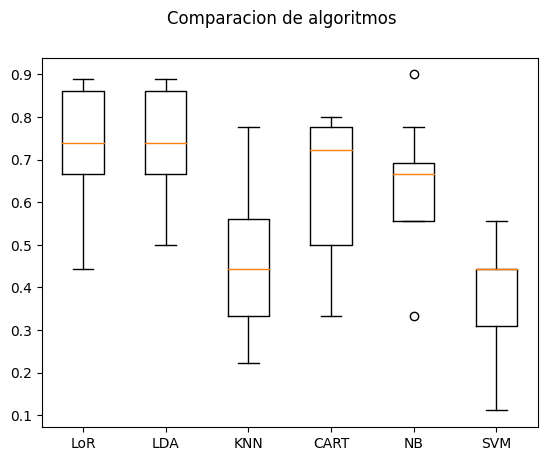

In [ ]:
# Comparacion de algoritmos
fig = plt.figure()
fig.suptitle('Comparacion de algoritmos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

En la siguiente sección, repetiremos esta comprobación realizando una estandarización, normalización o un tratamiento por Box-Cox del conjunto de datos de entrenamiento.


## <font color="#004D7F"> 4.3. Evaluar modelos: estandarización - normalización - Box-Cox</font>

Sospechamos que las diferentes distribuciones de los datos en bruto pueden estar afectando negativamente a la habilidad de algunos de los algoritmos. Vamos a evaluar los mismos algoritmos con una copia estandarizada del conjunto de datos. Aquí es donde los datos se transforman de manera que cada atributo tenga un valor medio de cero y una desviación estándar de uno.

También debemos evitar la fuga de datos cuando transformamos los datos. Una buena manera de evitar fugas es usar Pipelines que estandaricen los datos y construyan el modelo para cada _fold_ de la validación cruzada.



In [ ]:
# Estadarizacion de datos
pipelines = []
pipelines.append(('ScaledLoR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('Scaledk-NN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean()*100.0:,.2f}% ({cv_results.std()*100.0:,.2f}%)")

ScaledLoR: 75.22% (14.28%)
ScaledLDA: 73.11% (13.14%)
Scaledk-NN: 72.78% (11.39%)
ScaledCART: 62.33% (22.70%)
ScaledNB: 63.78% (14.41%)
ScaledSVM: 72.89% (12.19%)


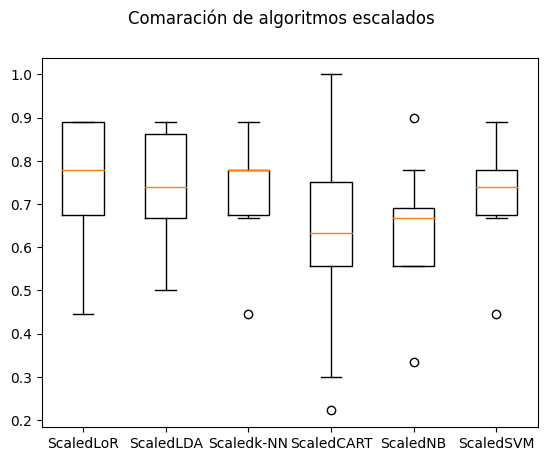

In [ ]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Comaración de algoritmos escalados')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


# <font color="#004D7F"> 5. Fase de Optimización</font>

En esta sección investigamos el ajuste de los parámetros para dos algoritmos que muestran mejores resultados, estos son: $k$-NN y SVM.


## <font color="#004D7F"> Optimización de $k$-NN</font>

Podemos comenzar ajustando el número de vecinos para $k$-NN. El número predeterminado de vecinos es 7. A continuación, probamos todos los valores impares de _k_ del 1 al 21, cubriendo el valor predeterminado de 7. Cada valor de _k_ se evalúa utilizando una validación cruzada 10 veces en el conjunto de datos estandarizado de entrenamiento.

In [ ]:
# Tune scaled KNN
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"{param}: {mean*100.0:,.2f}% ({stdev*100.0:,.2f}%)")

Best: 0.706667 using {'n_neighbors': 1}
{'n_neighbors': 1}: 70.67% (19.36%)
{'n_neighbors': 3}: 70.67% (15.86%)
{'n_neighbors': 5}: 69.67% (11.50%)
{'n_neighbors': 7}: 69.56% (14.90%)
{'n_neighbors': 9}: 69.56% (11.72%)
{'n_neighbors': 11}: 67.33% (14.81%)
{'n_neighbors': 13}: 64.11% (15.68%)
{'n_neighbors': 15}: 64.11% (16.91%)
{'n_neighbors': 17}: 67.33% (18.13%)
{'n_neighbors': 19}: 66.22% (16.77%)
{'n_neighbors': 21}: 69.44% (16.90%)


Podemos ver que la configuración óptima es $k=1$ con una accuracy medio del 70,67%. .

<a id="section52"></a>
## <font color="#004D7F"> Optimización de SVM</font>

Podemos ajustar dos parámetros clave del algoritmo SVM, el valor de _C_ (cuánto relajar el margen) y el tipo de _kernel_. El valor predeterminado para SVM (la clase SVC) es usar el _kernel_ de la función de base radial _(RBF)_ con un valor de _C_ establecido en 1.0. Al igual que con $k$-NN, realizaremos un `GridSearchCV` utilizando una validación cruzada de 10 con una copia estandarizada del conjunto de datos de entrenamiento. Intentaremos una serie de tipos de _kernel_ más simples y valores de _C_ con menos sesgo y más sesgo (menor que y más de 1.0 respectivamente).

Ejecutar el ejemplo imprime la mejor configuración, la precisión y las precisiones para todas las combinaciones de configuración.

In [ ]:
# Tuning SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1,0.3,0.4, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"{param}: {mean*100.0:,.2f}% ({stdev*100.0:,.2f}%)")

Best: 0.783333 using {'C': 1.0, 'kernel': 'linear'}
{'C': 0.1, 'kernel': 'linear'}: 76.11% (12.82%)
{'C': 0.1, 'kernel': 'poly'}: 43.00% (22.09%)
{'C': 0.1, 'kernel': 'rbf'}: 40.22% (13.83%)
{'C': 0.1, 'kernel': 'sigmoid'}: 49.00% (19.87%)
{'C': 0.3, 'kernel': 'linear'}: 78.22% (13.18%)
{'C': 0.3, 'kernel': 'poly'}: 46.33% (22.88%)
{'C': 0.3, 'kernel': 'rbf'}: 66.44% (13.01%)
{'C': 0.3, 'kernel': 'sigmoid'}: 64.00% (19.95%)
{'C': 0.4, 'kernel': 'linear'}: 78.22% (13.18%)
{'C': 0.4, 'kernel': 'poly'}: 49.67% (22.63%)
{'C': 0.4, 'kernel': 'rbf'}: 70.78% (12.71%)
{'C': 0.4, 'kernel': 'sigmoid'}: 68.44% (19.42%)
{'C': 0.5, 'kernel': 'linear'}: 78.22% (13.18%)
{'C': 0.5, 'kernel': 'poly'}: 52.89% (21.77%)
{'C': 0.5, 'kernel': 'rbf'}: 73.00% (12.77%)
{'C': 0.5, 'kernel': 'sigmoid'}: 69.56% (17.61%)
{'C': 0.7, 'kernel': 'linear'}: 77.22% (13.38%)
{'C': 0.7, 'kernel': 'poly'}: 59.56% (20.39%)
{'C': 0.7, 'kernel': 'rbf'}: 73.00% (12.77%)
{'C': 0.7, 'kernel': 'sigmoid'}: 69.56% (17.61%)
{'C': 0.

Podemos ver que la configuración más precisa fue SVM con un _kernel RBF_ y un valor _C_ de 1, con una precisión media del 78.33% es aparentemente mejor de lo que $k$-NN podría lograr.

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section6"></a>
# <font color="#004D7F"> Algoritmos ensamblados</font>

Otra forma en que podemos mejorar el rendimiento de los algoritmos en este problema es mediante el uso de modelos ensamblados. En esta sección evaluaremos cuatro algoritmos ensamblados diferentes, dos tipo Boosting y dos tipo  Bagging:
* Métodos Boosting: AdaBoost (AB) y Gradient Boosting (GBM).
* Métodos Bagging: Random Forest (RF) y Extra Trees (ET).

Utilizaresmo una validación cruzada de 10. No se utiliza la estandarización de datos en este caso porque los cuatro algoritmos de conjunto se basan en árboles de decisión que son menos sensibles a las distribuciones de datos.

In [ ]:
import xgboost
# Algoritmos ensamblados
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {mean*100.0:,.2f}% ({stdev*100.0:,.2f}%)")


AB: 68.67% (13.79%)
GBM: 68.67% (13.79%)
RF: 68.67% (13.79%)
ET: 68.67% (13.79%)


Podemos ver que ambas técnicas proporcionan puntajes de Accuracy bajos (por debajo de 70%) con configuraciones predeterminadas. Podemos trazar la distribución de puntajes de Accruacy en los _folds_ de validación cruzada.

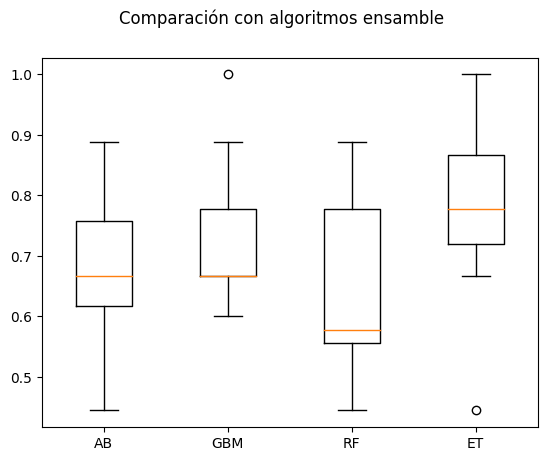

In [ ]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Comparación con algoritmos ensamble')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Los mejores modelos son 3: AB, GBM y FR que serían interesantes analizarlos posteriormente.

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section7"></a>
# <font color="#004D7F"> 7. Fase de Forecasting</font>

El SVM mostró el mejor resultado como un modelo estable y de baja complejidad para este problema. En esta sección finalizaremos el modelo entrenándolo en todo el conjunto de datos de entrenamiento y haremos predicciones para el conjunto de datos de validación para confirmar nuestros hallazgos.



In [ ]:
# Modelo final
# Preparación del modelo
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C=0.3,kernel='rbf')
model.fit(rescaledX, Y_train)


# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.625
[[ 4  3]
 [ 6 11]]
              precision    recall  f1-score   support

         1.0       0.40      0.57      0.47         7
         2.0       0.79      0.65      0.71        17

    accuracy                           0.62        24
   macro avg       0.59      0.61      0.59        24
weighted avg       0.67      0.62      0.64        24



Podemos ver que alcanzamos una precisión de casi del 62.5% en el conjunto de datos de validación extendido. Una puntuación que es un poco escaza. Sin embargo, debido a la cantidad de instancias no es un resultado tan desfavorable.

Tambien es importante recalcar que el modelo será mejor prediciendo la no existencia de cancer 79% (Falsos - Positivos).

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<div style="text-align: right"> <font size=6><i class="fa fa-coffee" aria-hidden="true" style="color:#004D7F"></i> </font></div>